In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from datetime import datetime, date

#**Import Data**

In [26]:
data = pd.read_csv('data.csv')

In [27]:
data

,Unnamed: 0,created_at,date,time,username,tweet
0,0,2021-11-21 14:30:01 SE Asia Standard Time,2021-11-21,14:30:01,nowbitcoinprice,nov 21 2021 072900 utc 5915880 5241270 4400...
1,1,2021-11-21 14:22:26 SE Asia Standard Time,2021-11-21,14:22:26,bitcoingraph,btcusdt h4
2,2,2021-11-21 14:17:14 SE Asia Standard Time,2021-11-21,14:17:14,shanaz3197,tunefmofficial jam hbar
3,4,2021-11-21 14:07:27 SE Asia Standard Time,2021-11-21,14:07:27,khaiyaraya,first meeting crypto trading kepada yang ing...
4,5,2021-11-21 14:00:01 SE Asia Standard Time,2021-11-21,14:00:01,nowbitcoinprice,nov 21 2021 065900 utc 5927870 5251900 4408...
...,...,...,...,...,...,...
3093,5784,2021-11-21 14:49:42 SE Asia Standard Time,2021-11-21,14:49:42,stevenjhsiahaan,halo sekarang kamu bisa investasi saham luar n...
3094,5785,2021-11-21 14:45:28 SE Asia Standard Time,2021-11-21,14:45:28,samuelcendikia1,halo sekarang kamu bisa investasi saham luar n...
3095,5786,2021-11-21 14:39:45 SE Asia Standard Time,2021-11-21,14:39:45,saturnusgo,binnybunny96 bigalphaid kripto haram mbak ttd...
3096,5787,2021-11-21 14:35:25 SE Asia Standard Time,2021-11-21,14:35:25,muhamad25615484,halo sekarang kamu bisa investasi saham luar n...


# Labeling TextBlob

In [38]:
data_en = pd.read_excel('datatweet.id.en.xlsx')
data_en

,Unnamed: 0,tweets
0,0,nov 21 2021 072900 utc 5915880 5241270 4400060...
1,1,btcusdt h4
2,2,tunefmofficial jam hbar
3,3,"first meeting crypto trading, those who want t..."
4,4,nov 21 2021 065900 utc 5927870 5251900 4408980...
...,...,...
3093,3093,hello now you can invest in foreign stocks and...
3094,3094,hello now you can invest in foreign stocks and...
3095,3095,binnybunny96 bigalphaid crypto haram sis signe...
3096,3096,hello now you can invest in foreign stocks and...


In [39]:
df = data.copy()

In [41]:
df['tweet_en']= data_en.iloc[:,1]
df

,Unnamed: 0,created_at,date,time,username,tweet,tweet_en
0,0,2021-11-21 14:30:01 SE Asia Standard Time,2021-11-21,14:30:01,nowbitcoinprice,nov 21 2021 072900 utc 5915880 5241270 4400...,nov 21 2021 072900 utc 5915880 5241270 4400060...
1,1,2021-11-21 14:22:26 SE Asia Standard Time,2021-11-21,14:22:26,bitcoingraph,btcusdt h4,btcusdt h4
2,2,2021-11-21 14:17:14 SE Asia Standard Time,2021-11-21,14:17:14,shanaz3197,tunefmofficial jam hbar,tunefmofficial jam hbar
3,4,2021-11-21 14:07:27 SE Asia Standard Time,2021-11-21,14:07:27,khaiyaraya,first meeting crypto trading kepada yang ing...,"first meeting crypto trading, those who want t..."
4,5,2021-11-21 14:00:01 SE Asia Standard Time,2021-11-21,14:00:01,nowbitcoinprice,nov 21 2021 065900 utc 5927870 5251900 4408...,nov 21 2021 065900 utc 5927870 5251900 4408980...
...,...,...,...,...,...,...,...
3093,5784,2021-11-21 14:49:42 SE Asia Standard Time,2021-11-21,14:49:42,stevenjhsiahaan,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...
3094,5785,2021-11-21 14:45:28 SE Asia Standard Time,2021-11-21,14:45:28,samuelcendikia1,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...
3095,5786,2021-11-21 14:39:45 SE Asia Standard Time,2021-11-21,14:39:45,saturnusgo,binnybunny96 bigalphaid kripto haram mbak ttd...,binnybunny96 bigalphaid crypto haram sis signe...
3096,5787,2021-11-21 14:35:25 SE Asia Standard Time,2021-11-21,14:35:25,muhamad25615484,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...


In [44]:
# Create a function to get the subjectivity 
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity 

# Create a function to get the polarity 
def getPolarity(text): 
    return TextBlob(text).sentiment.polarity  

#Create two new columns 
df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity) 
df['Polarity'] = df['tweet_en'].apply(getPolarity) 

#Show the new dataframe with the new columns 
df 

,Unnamed: 0,created_at,date,time,username,tweet,tweet_en,Subjectivity,Polarity
0,0,2021-11-21 14:30:01 SE Asia Standard Time,2021-11-21,14:30:01,nowbitcoinprice,nov 21 2021 072900 utc 5915880 5241270 4400...,nov 21 2021 072900 utc 5915880 5241270 4400060...,0.000000,0.00000
1,1,2021-11-21 14:22:26 SE Asia Standard Time,2021-11-21,14:22:26,bitcoingraph,btcusdt h4,btcusdt h4,0.000000,0.00000
2,2,2021-11-21 14:17:14 SE Asia Standard Time,2021-11-21,14:17:14,shanaz3197,tunefmofficial jam hbar,tunefmofficial jam hbar,0.000000,0.00000
3,4,2021-11-21 14:07:27 SE Asia Standard Time,2021-11-21,14:07:27,khaiyaraya,first meeting crypto trading kepada yang ing...,"first meeting crypto trading, those who want t...",0.333333,0.25000
4,5,2021-11-21 14:00:01 SE Asia Standard Time,2021-11-21,14:00:01,nowbitcoinprice,nov 21 2021 065900 utc 5927870 5251900 4408...,nov 21 2021 065900 utc 5927870 5251900 4408980...,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
3093,5784,2021-11-21 14:49:42 SE Asia Standard Time,2021-11-21,14:49:42,stevenjhsiahaan,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...,0.606250,-0.00625
3094,5785,2021-11-21 14:45:28 SE Asia Standard Time,2021-11-21,14:45:28,samuelcendikia1,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...,0.606250,-0.00625
3095,5786,2021-11-21 14:39:45 SE Asia Standard Time,2021-11-21,14:39:45,saturnusgo,binnybunny96 bigalphaid kripto haram mbak ttd...,binnybunny96 bigalphaid crypto haram sis signe...,0.000000,0.00000
3096,5787,2021-11-21 14:35:25 SE Asia Standard Time,2021-11-21,14:35:25,muhamad25615484,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...,0.606250,-0.00625


In [48]:
#Create a function to compute the negative, and positive analysis 
def getAnalysis(score): 
    if score < 0: 
        return 'Negative' 
    elif score > 0: 
        return 'Positive' 
    else:
        return 'Netral'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis) 

#Show the dataframe 
df 

,Unnamed: 0,created_at,date,time,username,tweet,tweet_en,Subjectivity,Polarity,Analysis
0,0,2021-11-21 14:30:01 SE Asia Standard Time,2021-11-21,14:30:01,nowbitcoinprice,nov 21 2021 072900 utc 5915880 5241270 4400...,nov 21 2021 072900 utc 5915880 5241270 4400060...,0.000000,0.00000,Netral
1,1,2021-11-21 14:22:26 SE Asia Standard Time,2021-11-21,14:22:26,bitcoingraph,btcusdt h4,btcusdt h4,0.000000,0.00000,Netral
2,2,2021-11-21 14:17:14 SE Asia Standard Time,2021-11-21,14:17:14,shanaz3197,tunefmofficial jam hbar,tunefmofficial jam hbar,0.000000,0.00000,Netral
3,4,2021-11-21 14:07:27 SE Asia Standard Time,2021-11-21,14:07:27,khaiyaraya,first meeting crypto trading kepada yang ing...,"first meeting crypto trading, those who want t...",0.333333,0.25000,Positive
4,5,2021-11-21 14:00:01 SE Asia Standard Time,2021-11-21,14:00:01,nowbitcoinprice,nov 21 2021 065900 utc 5927870 5251900 4408...,nov 21 2021 065900 utc 5927870 5251900 4408980...,0.000000,0.00000,Netral
...,...,...,...,...,...,...,...,...,...,...
3093,5784,2021-11-21 14:49:42 SE Asia Standard Time,2021-11-21,14:49:42,stevenjhsiahaan,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...,0.606250,-0.00625,Negative
3094,5785,2021-11-21 14:45:28 SE Asia Standard Time,2021-11-21,14:45:28,samuelcendikia1,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...,0.606250,-0.00625,Negative
3095,5786,2021-11-21 14:39:45 SE Asia Standard Time,2021-11-21,14:39:45,saturnusgo,binnybunny96 bigalphaid kripto haram mbak ttd...,binnybunny96 bigalphaid crypto haram sis signe...,0.000000,0.00000,Netral
3096,5787,2021-11-21 14:35:25 SE Asia Standard Time,2021-11-21,14:35:25,muhamad25615484,halo sekarang kamu bisa investasi saham luar n...,hello now you can invest in foreign stocks and...,0.606250,-0.00625,Negative


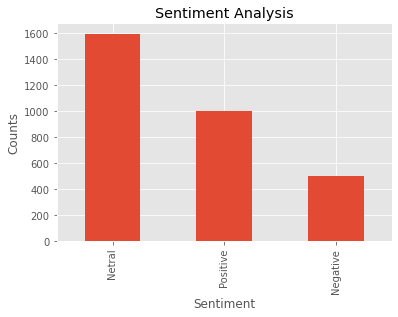

In [49]:
#Show the value counts 

df['Analysis'].value_counts() 

#plot and visualize the counts 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment') 
plt.ylabel('Counts') 
df['Analysis'].value_counts().plot(kind='bar') 
plt.show() 

In [50]:
df['Analysis'].value_counts() 

Netral      1597
Positive     999
Negative     502
Name: Analysis, dtype: int64

In [51]:
df.to_csv('datapredict.csv')

In [52]:
df.to_excel('datapredict.xlsx')